In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [100]:
data = pd.read_csv('heart.csv')

In [101]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* Here "cp" is chest pain type 
* "trestbps" is resting blood pressure (in mm Hg on admission to the hospital)
* "chol" is serum cholestoral in mg/dl
* "fbs" is (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* "restecg" is resting electrocardiographic results
* "thalach" is maximum heart rate achieved
* "exang" is exercise induced angina (1 = yes; 0 = no)
* "oldpeak" is ST depression induced by exercise relative to rest


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [103]:
data.shape

(303, 14)

In [104]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [105]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [106]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [107]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

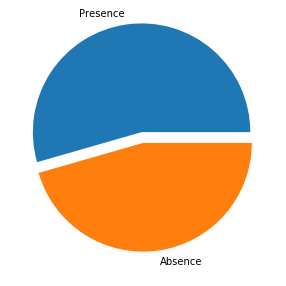

In [108]:
plt.figure(figsize=(5,5))
plt.pie(data['target'].value_counts(), labels=('Presence','Absence'), explode = [0.1,0])
plt.show()

Text(0.5, 1.0, 'Data Target')

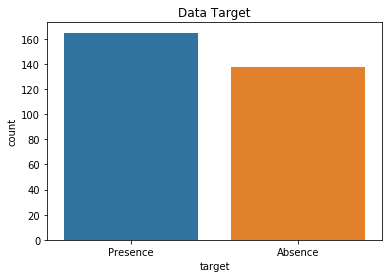

In [109]:
data_target = data['target'].map({1:'Presence', 0: 'Absence'})
sns.countplot(data_target)
plt.title("Data Target")

In [110]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


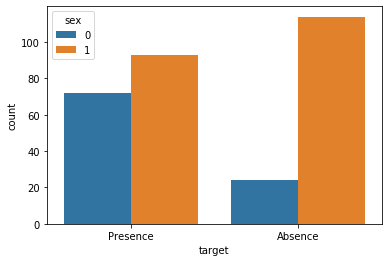

In [111]:
data_target = data['target'].map({1:'Presence', 0: 'Absence'})
sns.countplot(data_target,hue=data['sex'])

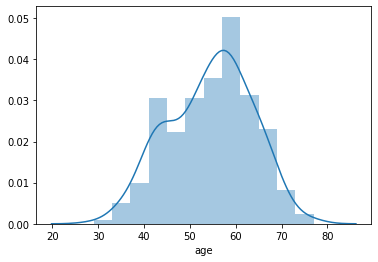

In [112]:
sns.distplot(data['age'],kde=True)

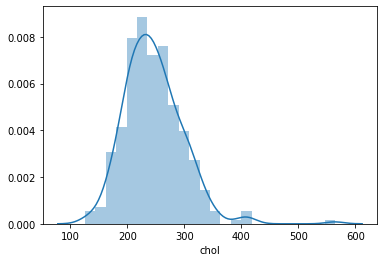

In [113]:
sns.distplot(data['chol'],kde=True)

### Train-Test Split

In [114]:
x = data.drop(['target'],axis=1)
y = data['target']

In [115]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=101, test_size=0.2)

### GridsearchCV

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [117]:
x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.3)

In [118]:
def searchCV(parameters,
    scores,
    x_train, 
    x_val,
    y_train,
    y_val,
    modelType = 'KNN' ):
    
    for score in scores:
        print ('Hyper parameter tuning for {}'.format(score ))
        if modelType == 'KNN':
            model = GridSearchCV(KNeighborsClassifier(),
                                parameters,
                                scoring = score)
        elif modelType == 'RF':
            model = GridSearchCV(RandomForestClassifier(),
                                parameters,
                                scoring=score)
        elif modelType == 'XGB':
            model = GridSearchCV(XGBClassifier(),
                                parameters,
                                scoring=score)
            
        model.fit(x_train,y_train)
        print ('The Best Parameters are:')
        print (model.best_params_)
        print ('Grid score on development set:')
        
        mean = model.cv_results_['mean_test_score']
        std = model.cv_results_['std_test_score']
        
        
        for mean, std, params in zip(mean, std, model.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
        print("Detailed classification report:")
        y_true, y_pred = y_val, model.predict(x_val)
        print(classification_report(y_true, y_pred))

### For KNN

In [119]:
parameters = [{"n_neighbors": [3,5,7],
                "weights": ["uniform", "distance"],
                "p": [1,2]}]

scores = ["accuracy","precision_macro","recall_macro"]


In [120]:
searchCV(parameters, scores, x_train , x_val, y_train, y_val)

Hyper parameter tuning for accuracy
The Best Parameters are:
{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Grid score on development set:
0.675 (+/-0.127) for {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.675 (+/-0.127) for {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.661 (+/-0.093) for {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.665 (+/-0.078) for {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}
0.694 (+/-0.094) for {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.698 (+/-0.104) for {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.675 (+/-0.153) for {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.679 (+/-0.120) for {'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.736 (+/-0.137) for {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.722 (+/-0.131) for {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.694 (+/-0.140) for {'n_neighbors': 7, 'p': 2, 'weights': 'uniform'}
0.699 (+/-0.132) for {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Detailed clas

### For XGBOOST

In [121]:
parameters = [{"min_child_weight": [5, 10],
                "colsample_bytree": [0.6, 0.8]}]
scores = ["accuracy","precision_macro","recall_macro"]
searchCV(parameters,
        scores,
        x_train,
        x_val,
        y_train,
        y_val,
        modelType = "XGB")

Hyper parameter tuning for accuracy
The Best Parameters are:
{'colsample_bytree': 0.8, 'min_child_weight': 10}
Grid score on development set:
0.793 (+/-0.108) for {'colsample_bytree': 0.6, 'min_child_weight': 5}
0.803 (+/-0.143) for {'colsample_bytree': 0.6, 'min_child_weight': 10}
0.784 (+/-0.119) for {'colsample_bytree': 0.8, 'min_child_weight': 5}
0.812 (+/-0.145) for {'colsample_bytree': 0.8, 'min_child_weight': 10}
Detailed classification report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.78        42
           1       0.80      0.88      0.83        49

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

Hyper parameter tuning for precision_macro
The Best Parameters are:
{'colsample_bytree': 0.8, 'min_child_weight': 10}
Grid score on development set:
0.799 (+/-0.105) for {'colsample_bytree': 0.6, 'min_child_weight': 5

### For RandomForest

In [93]:
parameters = [{"n_estimators": [10, 50, 100],
                "criterion": ["gini", "entropy"],
                "max_features": ["auto", "sqrt", "log2"]}]

scores = ["accuracy"]

searchCV(parameters,
        scores,
        x_train,
        x_val,
        y_train,
        y_val,
        modelType = "RF")

Hyper parameter tuning for accuracy
The Best Parameters are:
{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50}
Grid score on development set:
0.779 (+/-0.086) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}
0.825 (+/-0.071) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50}
0.816 (+/-0.131) for {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}
0.806 (+/-0.114) for {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10}
0.821 (+/-0.097) for {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}
0.811 (+/-0.090) for {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}
0.821 (+/-0.128) for {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 10}
0.797 (+/-0.105) for {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 50}
0.811 (+/-0.083) for {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
0.778 (+/-0.104) for {'criterion': 'entropy', 'max_featu

### Model

In [122]:
model = XGBClassifier(colsample_bytree = 0.8, min_child_weight = 10)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.819672131147541

In [124]:
prediction = model.predict(x_test)

In [127]:
 print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81        31
           1       0.77      0.90      0.83        30

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61

